## MACHINE LEARNING A/B TESTING

A/b testing compares the conversion rates of only two groups; Exposed group and the Control group. But in the real world, the situation and even the behaviours of online users is complex and more dynamic. Situations such as:

Online users spend a different amount of time in the Advertisement. Users take different paths to the Ad. Users use different devices and Also view the Ad on different dates.
With all these complexity, machine learning helps in generating insights from these complex systems.

#### Importing Libraries

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [2]:
# import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
import scipy.stats as stat
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.display import Image  

from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')
import dvc.api

#### Importing Scripts 

In [3]:
from randforest import RandomForestClassifierModel
from decisiontree import DecisionTreesModel
from logesticregression import LogesticRegressionModel
#from xgboost import XGBClassifierModel
from file import Myfile
import util
import plot


In [4]:
path = "../data/AdSmartABdata.csv"

In [8]:
# initialize the class that has utility function we are going to use
file = Myfile()

In [7]:
# we use our file function to read csv data
df = file.read_csv(path)

--> file read as csv


In [9]:
#top 5 raws
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0


#### K-Fold Cross-validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. 

1. Logistic Regression
2. Decision Tree
3. RandomForest
4. XGBoost

#### Drop observations where users didn't respond to the questionaire

In [10]:
#drop columns where yes and no are both 0
drop_null = df.query('yes==0 and no==0') 
df=df.drop(drop_null.index)
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0


#### Creating 'awarness' column 

In [11]:
def data(tag, 
            path='data/AdSmartABdata.csv', 
            repo ='C:/Users/user/Desktop/10Academy/Smart-Ads-campaign-performance-analysis'
):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [12]:
# Function for creating an awareness column
def awareness (row):
    if row['yes'] == 1 :
         return '1'
    if row['no'] == 1 :
        return '0'
def calculate_metrics(y_test, y_preds):
    
    accuracy = accuracy_score(y_test, y_preds)
    return accuracy

In [13]:
# apply awareness to each row
df['awareness'] = df.apply (lambda row: awareness(row), axis=1) 
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0


In [14]:
clean_data = "../data/AdSmartABdata.csv"
file.save_csv(df, clean_data)

--> File Successfully Saved.!!!


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1238,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0,1
1239,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0,1
1240,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1,0
1241,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1,0


#### Transform categorical variables to numerical value

In [15]:
# transform categorical variables to numerical value
lb = LabelEncoder()
df['awareness'] = lb.fit_transform(df['awareness'])
df['device_make'] = lb.fit_transform(df['device_make'])
df['date'] = lb.fit_transform(df['date'])
df['experiment'] = lb.fit_transform(df['experiment'])
df['browser'] = lb.fit_transform(df['browser'])

#### Data spliting by browser and platform

In [16]:
platfrom_df = df[["experiment", "hour", "date", 'device_make', 'platform_os', 'awareness']]
broweser_df = df[["experiment", "hour", "date", 'device_make', 'browser', 'awareness']]

Top 5 raws grouped by platform os

In [18]:
#Top 5 raws grouped by platform os
platfrom_df.head()

,experiment,hour,date,device_make,platform_os,awareness
0,1,2,2,4,6,0
1,1,16,1,13,6,1
2,1,8,3,13,6,0
3,0,4,5,43,6,1
4,0,15,0,13,6,0


Top 5 raws grouped by browser

In [19]:
#Top 5 raws grouped by browser()
broweser_df.head()

,experiment,hour,date,device_make,browser,awareness
0,1,2,2,4,2,0
1,1,16,1,13,1,1
2,1,8,3,13,1,0
3,0,4,5,43,4,1
4,0,15,0,13,1,0


#### Save dataframes to DVC version

In [17]:
#file.save_csv(browser_df, "../data/AdSmartABdata.csv")

In [18]:
#file.save_csv(platfrom_df, "../data/AdSmartABdata.csv")

#### 1 Model training using Logestic Regression

##### 1.1 Model trainig using Logestic Regression using browser dataframe

In [19]:
feature_cols = ["experiment", "hour", "date", 'device_make', 'browser']

X = broweser_df[feature_cols]
y = broweser_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [20]:
logesticRegressionModel = LogesticRegressionModel(X_train, X_test,  y_train, y_test)

clf2, loss_arr_2, acc_arr_2 = logesticRegressionModel.train(6)

step 0: Validation Accuracy of LogesticRegression is: 0.545
step 0: Validation Loss of LogesticRegression is: 0.674

step 1: Validation Accuracy of LogesticRegression is: 0.561
step 1: Validation Loss of LogesticRegression is: 0.662

step 2: Validation Accuracy of LogesticRegression is: 0.511
step 2: Validation Loss of LogesticRegression is: 0.699

step 3: Validation Accuracy of LogesticRegression is: 0.527
step 3: Validation Loss of LogesticRegression is: 0.688

step 4: Validation Accuracy of LogesticRegression is: 0.597
step 4: Validation Loss of LogesticRegression is: 0.635

step 5: Validation Accuracy of LogesticRegression is: 0.559
step 5: Validation Loss of LogesticRegression is: 0.664



step 1: Test Accuracy of LogesticRegression is: 0.552
Test Metrics
              precision    recall  f1-score   support

           0       0.88      0.54      0.67       105
           1       0.20      0.60      0.30        20

    accuracy                           0.55       125
   macro avg       0.54      0.57      0.49       125
weighted avg       0.77      0.55      0.61       125



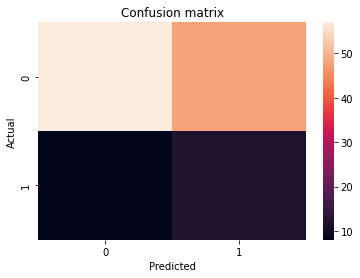

In [21]:
test_acc2, test_loss2, report2, matrix2  = logesticRegressionModel.test()

In [22]:
def calculate_p_values(df):
    
    d = (2.0*(1.0+np.cosh(df.clf.decision_function(X))))
    d = np.tile(d,(X.shape[1],1)).T
    F_ij = np.dot((X/d).T,X) ## Fisher Information Matrix
    Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
    sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
    z_scores = df.clf.coef_[0]/sigma_estimates # z-score 
    p_values = [stat.norm.sf(abs(x)) for x in z_scores] ### two tailed test for p-values
        
    p_value_df = pd.DataFrame()
    p_value_df['features'] = df.X_train.columns.to_list()
    p_value_df['p_values'] = p_values
        
    return p_value_df
def plot_pvalues(self, p_df):
        
    fig, ax = plt.subplots(figsize=(12,7))

    ax.plot([0.05,0.05], [0.05,5])
    sns.scatterplot(data=p_df, y='features', x='p_values', color="green")
    plt.title("P values of features", size=20)

    plt.xticks(np.arange(0,max(p_df['p_values']) + 0.05, 0.05))

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

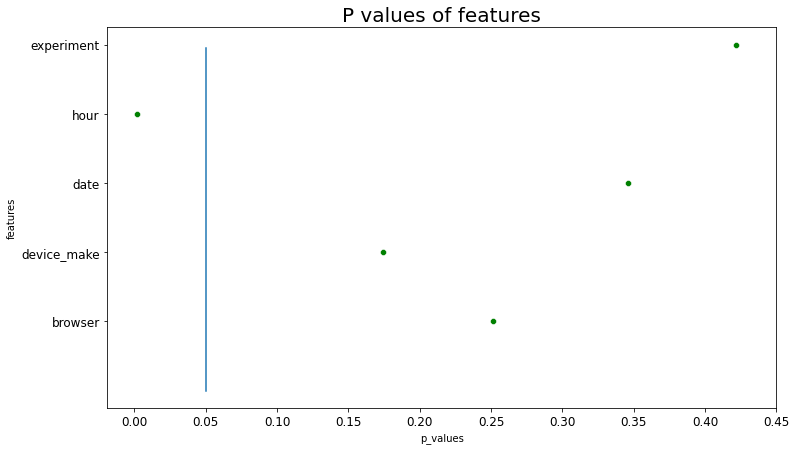

,features,p_values
0,experiment,0.421577
1,hour,0.001683
2,date,0.345851
3,device_make,0.174395
4,browser,0.251464


In [23]:
p_values_df = calculate_p_values(logesticRegressionModel)
plot_pvalues(logesticRegressionModel,p_values_df)
p_values_df

#### Analysis of the result

To have a significance p_value must be less than 0.05. therefor from the testing we analysis that:
* The highest contributing factor for the 'awarness' is 'hour__
  P-value of hour is 0.001

* The second contributing factor for the 'awarness' is 'device_make__
  P-value of device_make is 0.174 
* The least contributing factors are 'experiment & date__
  'experiment' & 'date' feature has no statistical siginficance means it is not contributing anything for the awareness. 


#### 1.2 Model training using Logestic Regression using platfrom dataframe

In [24]:
# define feature columns for the model
feature_cols = ["experiment", "hour", "date", 'device_make', 'platform_os']

X = platfrom_df[feature_cols]
y = platfrom_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [25]:
#Train the model
logesticRegressionModel2 = LogesticRegressionModel(X_train, X_test,  y_train, y_test)
clf2, loss_arr_2, acc_arr_2 = logesticRegressionModel2.train(6)

step 0: Validation Accuracy of LogesticRegression is: 0.492
step 0: Validation Loss of LogesticRegression is: 0.713

step 1: Validation Accuracy of LogesticRegression is: 0.545
step 1: Validation Loss of LogesticRegression is: 0.674

step 2: Validation Accuracy of LogesticRegression is: 0.522
step 2: Validation Loss of LogesticRegression is: 0.692

step 3: Validation Accuracy of LogesticRegression is: 0.505
step 3: Validation Loss of LogesticRegression is: 0.703

step 4: Validation Accuracy of LogesticRegression is: 0.591
step 4: Validation Loss of LogesticRegression is: 0.639

step 5: Validation Accuracy of LogesticRegression is: 0.575
step 5: Validation Loss of LogesticRegression is: 0.652



step 1: Test Accuracy of LogesticRegression is: 0.552
Test Metrics
              precision    recall  f1-score   support

           0       0.91      0.54      0.68       109
           1       0.17      0.62      0.26        16

    accuracy                           0.55       125
   macro avg       0.54      0.58      0.47       125
weighted avg       0.81      0.55      0.63       125



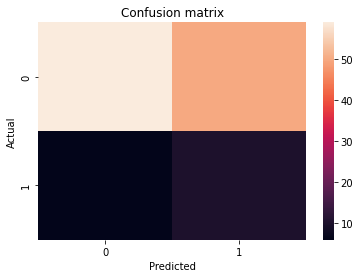

In [26]:
#Test the model
test_acc2, test_loss2, report2, matrix2  = logesticRegressionModel2.test()

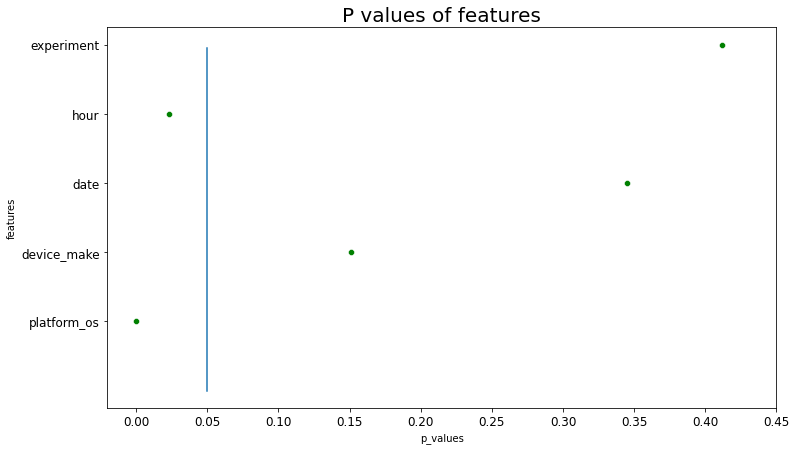

In [27]:
#calculating and visualize P_values
p_values_df2 = calculate_p_values(logesticRegressionModel2)
plot_pvalues(logesticRegressionModel,p_values_df2)


#### Analaysis of the result

To have a significance p_value must be less than 0.05. therefor from the testing we analysis that:
* The highest contributing factor for the 'awarness' are plat_os_ P-value of: 0.001 and 'hour__
  P-value:  0.001

* The least contributing factors are 'experiment & date__
  'experiment' & 'date' feature has no statistical siginficance means it is not contributing anything for the awareness. 


### 2. Model training using Decision Tree 

#### 2.1 Model training using Decision Tree using browser dataframe

In [17]:
#define feature columns for the train
feature_columns = ["experiment", "hour", "date", 'device_make', 'browser']

X = broweser_df[feature_columns]
y = broweser_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [18]:
decisionTreesModel = DecisionTreesModel(X_train, X_test,  y_train, y_test)

clf, acc_arr, loss_arr = decisionTreesModel.train(6)

step 0: Validation Accuracy of DecisionTreesModel is: 0.561
step 0: Validation Loss of DecisionTreesModel is: 0.662

step 1: Validation Accuracy of DecisionTreesModel is: 0.503
step 1: Validation Loss of DecisionTreesModel is: 0.705

step 2: Validation Accuracy of DecisionTreesModel is: 0.543
step 2: Validation Loss of DecisionTreesModel is: 0.676

step 3: Validation Accuracy of DecisionTreesModel is: 0.522
step 3: Validation Loss of DecisionTreesModel is: 0.692

step 4: Validation Accuracy of DecisionTreesModel is: 0.554
step 4: Validation Loss of DecisionTreesModel is: 0.668

step 5: Validation Accuracy of DecisionTreesModel is: 0.548
step 5: Validation Loss of DecisionTreesModel is: 0.672



step 1: Test Accuracy of DecisionTreesModel is: 0.528
Test Metrics
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       122
           1       0.03      0.67      0.06         3

    accuracy                           0.53       125
   macro avg       0.51      0.60      0.37       125
weighted avg       0.96      0.53      0.67       125

Loss on test data is: 0.687



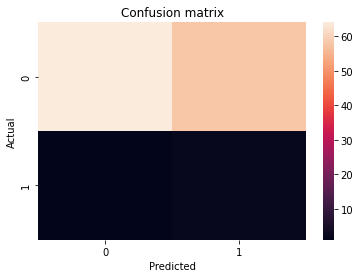

In [19]:
#test the model
test_acc, loss, report, confusion_matrix = decisionTreesModel.test()
print(f"Loss on test data is: {loss:.3f}")
print()

Calculating feature importance

In [20]:
decisionTreesModel.get_feature_importance()

,feature,feature_importances
0,experiment,0.034541
1,hour,0.336136
2,date,0.042059
3,device_make,0.424922
4,browser,0.162342


#### Analysis of the result


* The highest contributing factor for the 'awarness' is 'hour__ with
  Feature importance of  0.336136

* The second contributing factor for the 'awarness' is 'device_make__with
  Feature importance of  0.335144

* The third contributing factor for the 'awarness' is 'browser__with
  Feature importance of 0.187993

* The least contributing factor is 'experiment__and date:
  'experiment' and date feature have 0 factor on Decision Tree Model, which means it is not contributing anything for the awareness. 

#### Visualzing feature importance

In [ ]:
#
dot_data = StringIO()

leaves_parallel=False
feature_cols = ["experiment", "hour", "date", 'device_make', 'browser']
out_put_file = "AbTestDecisionTree.dot"

dot_data = export_graphviz(clf, out_file=out_put_file,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Aware','Not Aware'])

graph = pydotplus.graphviz.graph_from_dot_file(out_put_file)
graph.write_png('AbTestDecisionTree.png')

Image(graph.create_png())

#### 2.2 Model training using Decision Tree using 'platform' dataframe

In [21]:
#defining feature columns
feature_columns = ["experiment", "hour", "date", 'device_make', 'platform_os']

X = platfrom_df[feature_columns]
y = platfrom_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [22]:
#train the model
decisionTreesModel = DecisionTreesModel(X_train, X_test,  y_train, y_test)

clf, acc_arr, loss_arr = decisionTreesModel.train(6)

step 0: Validation Accuracy of DecisionTreesModel is: 0.545
step 0: Validation Loss of DecisionTreesModel is: 0.674

step 1: Validation Accuracy of DecisionTreesModel is: 0.487
step 1: Validation Loss of DecisionTreesModel is: 0.716

step 2: Validation Accuracy of DecisionTreesModel is: 0.554
step 2: Validation Loss of DecisionTreesModel is: 0.668

step 3: Validation Accuracy of DecisionTreesModel is: 0.500
step 3: Validation Loss of DecisionTreesModel is: 0.707

step 4: Validation Accuracy of DecisionTreesModel is: 0.554
step 4: Validation Loss of DecisionTreesModel is: 0.668

step 5: Validation Accuracy of DecisionTreesModel is: 0.548
step 5: Validation Loss of DecisionTreesModel is: 0.672



step 1: Test Accuracy of DecisionTreesModel is: 0.536
Test Metrics
              precision    recall  f1-score   support

           0       0.89      0.53      0.67       109
           1       0.15      0.56      0.24        16

    accuracy                           0.54       125
   macro avg       0.52      0.55      0.45       125
weighted avg       0.80      0.54      0.61       125

Loss on test data is: 0.681



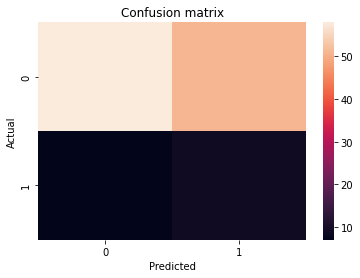

In [23]:
#test model
test_acc, loss, report, confusion_matrix = decisionTreesModel.test()
print(f"Loss on test data is: {loss:.3f}")
print()

In [24]:
decisionTreesModel.get_feature_importance()

,feature,feature_importances
0,experiment,0.036871
1,hour,0.358816
2,date,0.237863
3,device_make,0.366450
4,platform_os,0.000000


##### Analysis the result

* The highest contributing factor for the 'awarness' is ' device_make__
  Feature importance: 0.3667869

* The second contributing factor for the 'awarness' is 'hour__
  Feature importance: 0.358816

* The third contributing factor for the 'awarness' is 'date
  Feature importance: 0.237863
* The least contributing factor is 'experiment & platform__
  'platform' feature has 0 factor on Decision Tree Model, which means it is not contributing anything for the awareness. 

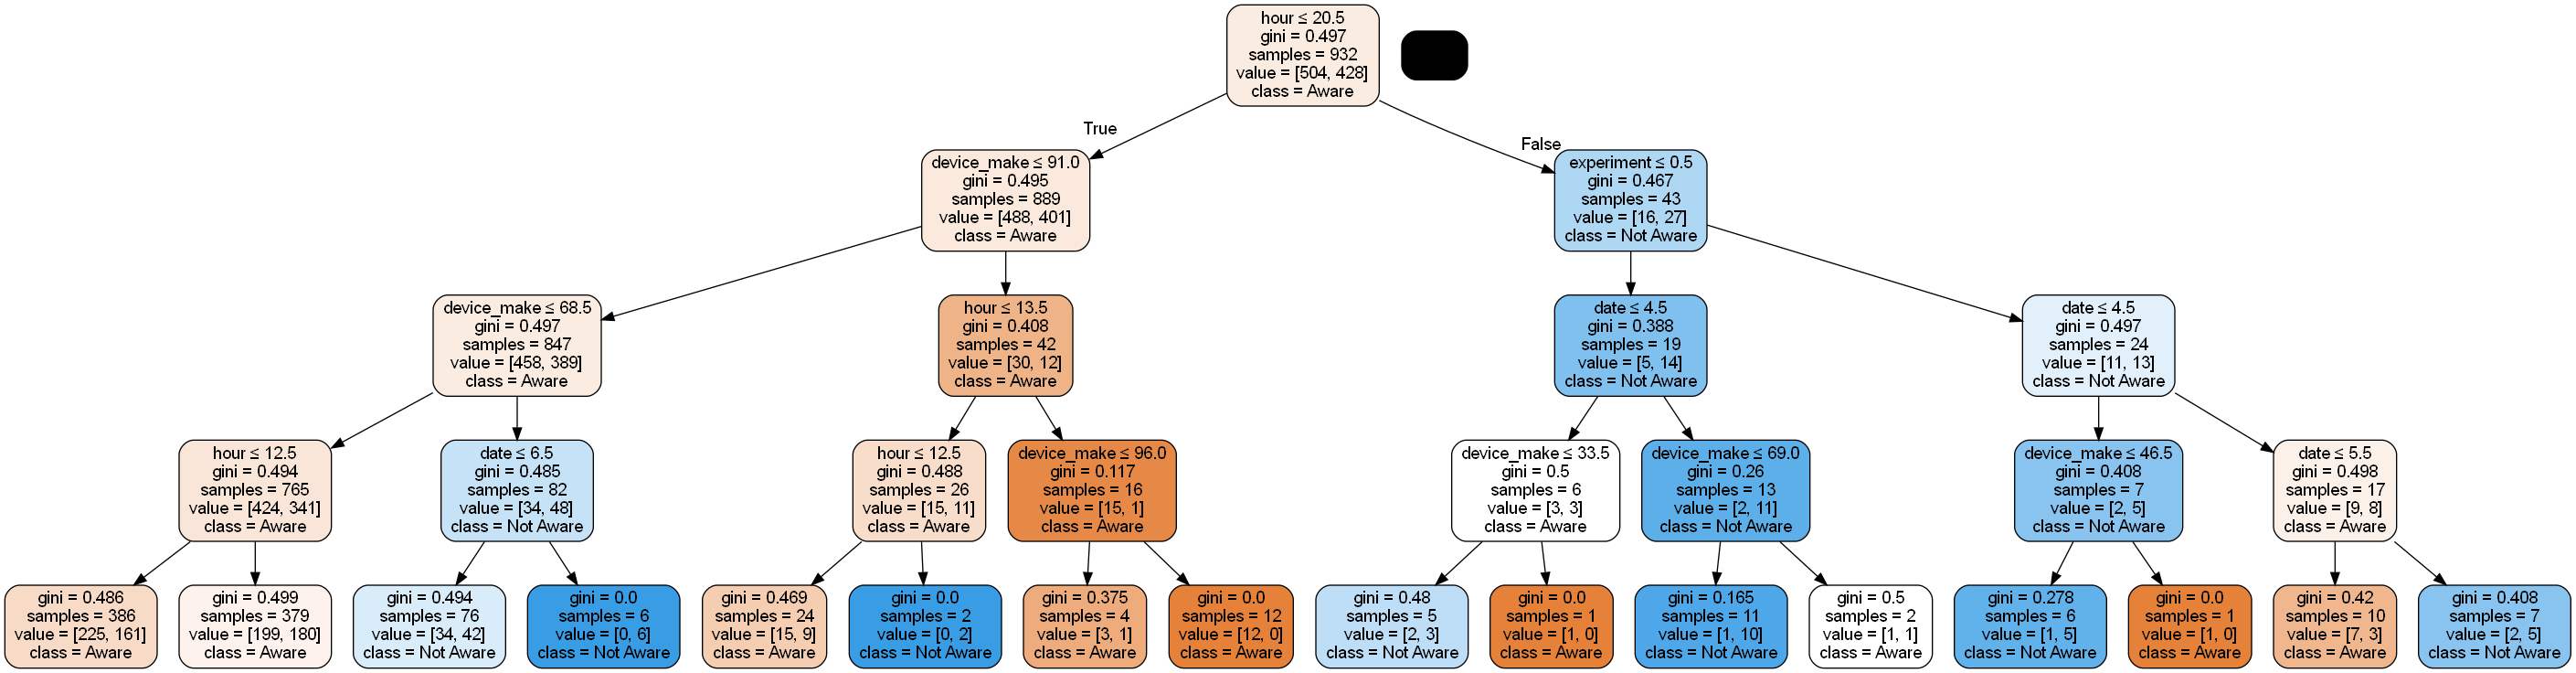

In [ ]:
dot_data = StringIO()

leaves_parallel=False
feature_columns = ["experiment", "hour", "date", 'device_make', 'browser']
out_put_file = "AbTestDecisionTree.dot"

dot_data = export_graphviz(clf, out_file=out_put_file,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_columns,class_names=['Aware','Not Aware'])

graph = pydotplus.graphviz.graph_from_dot_file(out_put_file)
graph.write_png('AbTestDecisionTree.png')

Image(graph.create_png())

#### Random Forest
#### 3.1 Train model using Random Forest using browser dataframe

In [21]:
#set feature columns
feature_columns = ["experiment", "hour", "date", 'device_make', 'browser']

X = broweser_df[feature_columns]
y = broweser_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [22]:
#train the model
randomForestClassifierModel = RandomForestClassifierModel(X_train, X_test,  y_train, y_test)

clf, acc_arr, loss_arr = randomForestClassifierModel.train(6)

step 0: Validation Accuracy of RandomForestModel is: 0.545
step 0: Validation Loss of RandomForestModel is: 0.674

step 1: Validation Accuracy of RandomForestModel is: 0.503
step 1: Validation Loss of RandomForestModel is: 0.705

step 2: Validation Accuracy of RandomForestModel is: 0.543
step 2: Validation Loss of RandomForestModel is: 0.676

step 3: Validation Accuracy of RandomForestModel is: 0.473
step 3: Validation Loss of RandomForestModel is: 0.726

step 4: Validation Accuracy of RandomForestModel is: 0.511
step 4: Validation Loss of RandomForestModel is: 0.699

step 5: Validation Accuracy of RandomForestModel is: 0.597
step 5: Validation Loss of RandomForestModel is: 0.635



step 1: Test Accuracy of RandomForestModel is: 0.528
Test Metrics
              precision    recall  f1-score   support

           0       0.69      0.54      0.60        84
           1       0.35      0.51      0.42        41

    accuracy                           0.53       125
   macro avg       0.52      0.52      0.51       125
weighted avg       0.58      0.53      0.54       125

Loss on test data is: 0.687



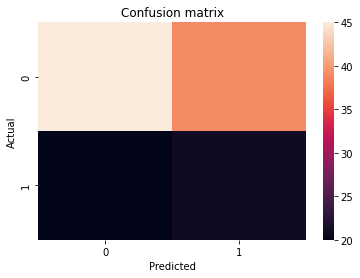

In [23]:
test_acc, loss, report, confusion_matrix = randomForestClassifierModel.test()
print(f"Loss on test data is: {loss:.3f}")
print()

In [24]:
randomForestClassifierModel.get_feature_importance()

,feature,feature_importances
0,experiment,0.051234
1,hour,0.387582
2,date,0.197558
3,device_make,0.279995
4,browser,0.083631


#### Result Analaysis

The highest contributing factor for the 'awarness' is ' hour__ Feature importance: 0.388104

The second contributing factor for the 'awarness' is 'device_make__ Feature importance: 0.287511

The third contributing factor for the 'awarness' is 'date Feature importance: 0.188162

The least contributing factor for the awarness are 'experiment & browser.

#### 3.2 Train model using Random Forest using platform dataframe

In [26]:
#set feature columns
feature_cols = ["experiment", "hour", "date", 'device_make', 'platform_os']

X = platfrom_df[feature_cols]
y = platfrom_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [27]:
#train the model
randomForestClassifier2 = RandomForestClassifierModel(X_train, X_test,  y_train, y_test)
clf, acc_arr, loss_arr = randomForestClassifier2.train(6)

step 0: Validation Accuracy of RandomForestModel is: 0.551
step 0: Validation Loss of RandomForestModel is: 0.670

step 1: Validation Accuracy of RandomForestModel is: 0.513
step 1: Validation Loss of RandomForestModel is: 0.698

step 2: Validation Accuracy of RandomForestModel is: 0.570
step 2: Validation Loss of RandomForestModel is: 0.656

step 3: Validation Accuracy of RandomForestModel is: 0.478
step 3: Validation Loss of RandomForestModel is: 0.722

step 4: Validation Accuracy of RandomForestModel is: 0.548
step 4: Validation Loss of RandomForestModel is: 0.672

step 5: Validation Accuracy of RandomForestModel is: 0.586
step 5: Validation Loss of RandomForestModel is: 0.643



step 1: Test Accuracy of RandomForestModel is: 0.536
Test Metrics
              precision    recall  f1-score   support

           0       0.69      0.54      0.61        83
           1       0.37      0.52      0.43        42

    accuracy                           0.54       125
   macro avg       0.53      0.53      0.52       125
weighted avg       0.58      0.54      0.55       125

Loss on test data is: 0.681



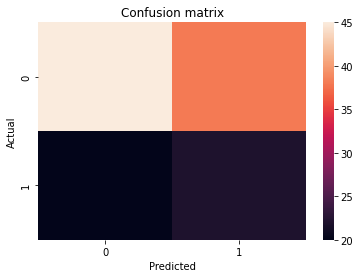

In [28]:
#test the model
test_acc, loss, report, confusion_matrix = randomForestClassifier2.test()
print(f"Loss on test data is: {loss:.3f}")
print()

In [29]:
#compute feature importance
randomForestClassifier2.get_feature_importance()

,feature,feature_importances
0,experiment,0.037643
1,hour,0.414375
2,date,0.186161
3,device_make,0.357911
4,platform_os,0.003910


#### Result Analaysis

* The highest contributing factor for the 'awarness' is ' hour__ Feature importance: 0.403919
* The second contributing factor for the 'awarness' is 'device_make__ Feature importance: 0.360734
* The third contributing factor for the 'awarness' is 'date_ Feature importance: 0.193033
* The least contributing factor for the awarness are 'experiment & browser.

#### 4. XGBoost
#### 4.1 Train model using XGBoost using browser datafram

In [ ]:
#I have issue of XGBOOST package with my Os so...

In [ ]:
# set feature columns
feature_columns = ["experiment", "hour", "date", 'device_make', 'browser']

X = broweser_df[feature_columns]
y = broweser_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:
# train model
xgbClassifierModel = XGBClassifierModel(X_train, X_test,  y_train, y_test)

clf, acc_arr, loss_arr = xgbClassifierModel.train(6)

In [ ]:
# test model
test_acc, loss, report, confusion_matrix = xgbClassifierModel.test()
print(f"Loss on test data is: {loss:.3f}")
print()

In [ ]:
#compute feature importance
xgbClassifierModel.get_feature_importance()

#### 4.2 Train model using XGBoost using Platform datafram

In [ ]:
#set feature columns
feature_cols = ["experiment", "hour", "date", 'device_make', 'platform_os']

X = platfrom_df[feature_cols]
y = platfrom_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:
#train model
xgbClassifierModel2 = XGBClassifierModel(X_train, X_test,  y_train, y_test)

clf, acc_arr, loss_arr = xgbClassifierModel2.train(6)

In [ ]:
#test model
test_acc, loss, report, confusion_matrix = xgbClassifierModel2.test()
print(f"Loss on test data is: {loss:.3f}")
print()

In [ ]:
#compute feature importance
xgbClassifierModel2.get_feature_importance()